#Upper confidence bound


In [1]:
import pandas as pd
data = pd.read_csv('Ads_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [2]:
import math
N = 10000
d = 10
ads_selected = []
total_reward = 0
no_of_selections = [0]*d
sum_of_rewards = [0]*d

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if no_of_selections[i] > 0:
            average_reward = sum_of_rewards[i]/no_of_selections[i]
            ucb = math.sqrt(2*math.log(n+1)/no_of_selections[i])
            upper_bound = average_reward + ucb
        else:
            upper_bound = 1e500    
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad] += 1
    reward = data.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward   
    

In [3]:
print(sum_of_rewards)
print(total_reward)

[176, 48, 31, 40, 1519, 1, 52, 217, 34, 7]
2125


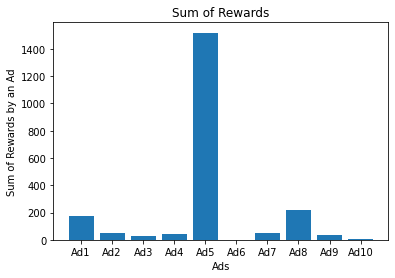

In [4]:
from matplotlib import pyplot as plt
plt.xlabel("Ads")
plt.ylabel("Sum of Rewards by an Ad")
plt.title("Sum of Rewards")
plt.bar(["Ad1", "Ad2", "Ad3", "Ad4", "Ad5", "Ad6", "Ad7", "Ad8", "Ad9", "Ad10"], sum_of_rewards)
plt.show()

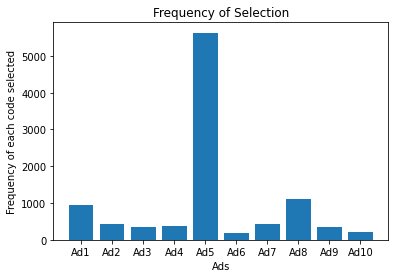

In [5]:
from matplotlib import pyplot as plt
plt.xlabel("Ads")
plt.ylabel("Frequency of each code selected")
plt.title("Frequency of Selection")
plt.bar(["Ad1", "Ad2", "Ad3", "Ad4", "Ad5", "Ad6", "Ad7", "Ad8", "Ad9", "Ad10"], no_of_selections)
plt.show()